In [1]:
"""Assignment: Create a vector layer out of the Raw data of the Drought of Bangladesh, classify the drought
data according to the Drought class/intensity and add a background map to locate the position of 
various drought data. """ 






import pandas as pd
from simpledbf import Dbf5
import matplotlib.pyplot as plt
import geopandas as gpd

/home/hp/.local/lib/python3.8/site-packages/geopandas/_compat.py:84: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.8.1-CAPI-1.13.3). Conversions between both will be slow.
  warnings.warn(


In [7]:
# Read the Drought data that is in .dbf file format


data1 = gpd.read_file("bgd_nhr_drought_sparsso.dbf")
data1

# Notice that the value of the all emtries for the column 'geometry' is None

,AREA,PERIMETER,DD_TM_,DD_TM_ID,GEOCODE,THANANAME,DROU_CLASS,DROUGHT_CL,THANA_NAME,AREA_SQKM,geometry
0,90394100.0,65584.950,2,13135,57790,Tentulia,3,Moderate,TENTULIA,196.73,None
1,1440360.0,4800.594,3,13132,57790,Tentulia,10,"Non T.Aman Areas (MLL, LL, VLL & Hills)",TENTULIA,196.73,None
2,24956400.0,25367.530,4,13134,57790,Tentulia,2,Severe,TENTULIA,196.73,None
3,24473100.0,25712.760,5,13133,57790,Tentulia,3,Moderate,TENTULIA,196.73,None
4,14474800.0,23933.420,6,13131,57790,Tentulia,2,Severe,TENTULIA,196.73,None
...,...,...,...,...,...,...,...,...,...,...,...
12567,624666.6,3146.267,12569,6,22290,Teknaf,4,Slight,TEKNAF,3.86,None
12568,810528.4,3752.297,12570,5,22290,Teknaf,11,"Non T.Aman Areas (MLL, LL, VLL & Hills)",TEKNAF,3.86,None
12569,671499.6,3209.002,12571,2,22290,Teknaf,1,Very Severe,TEKNAF,3.86,None
12570,509281.7,3314.200,12572,3,22290,Teknaf,11,"Non T.Aman Areas (MLL, LL, VLL & Hills)",TEKNAF,3.86,None


In [8]:
# Delete the column 'geometry'

data2 = data1.drop(['geometry'],axis =1)

In [4]:
# Raed a sample .dbf file of Bangladesh boundary. In which, the entities of the 'geometry column is not None.

bd = gpd.read_file("bgd_adm_bbs_20201113_SHP/bgd_admbnda_adm4_bbs_20201113.dbf")
bd

,Shape_Leng,Shape_Area,ADM4_EN,ADM4_PCODE,ADM4_REF,ADM4ALT1EN,ADM4ALT2EN,ADM3_EN,ADM3_PCODE,ADM2_EN,ADM2_PCODE,ADM1_EN,ADM1_PCODE,ADM0_EN,ADM0_PCODE,date,validOn,validTo,geometry
0,0.286382,0.001944,Abaipur,BD40448010,None,None,None,Shailkupa,BD404480,Jhenaidah,BD4044,Khulna,BD40,Bangladesh,BD,2015-01-01,2020-11-13,None,"POLYGON ((89.29995 23.62161, 89.30005 23.62142..."
1,0.098597,0.000317,Abdullahpur,BD30599411,None,None,None,Tongibari,BD305994,Munshiganj,BD3059,Dhaka,BD30,Bangladesh,BD,2015-01-01,2020-11-13,None,"POLYGON ((90.48251 23.55370, 90.48244 23.55351..."
2,0.170051,0.001055,Abdullapur,BD10092513,None,None,None,Char Fasson,BD100925,Bhola,BD1009,Barisal,BD10,Bangladesh,BD,2015-01-01,2020-11-13,None,"POLYGON ((90.70433 22.15793, 90.70435 22.15791..."
3,0.055861,0.000172,Abdullapur,BD20153311,None,None,None,Fatikchhari,BD201533,Chittagong,BD2015,Chittagong,BD20,Bangladesh,BD,2015-01-01,2020-11-13,None,"POLYGON ((91.87498 22.57881, 91.87495 22.57865..."
4,0.312536,0.002235,Abdulpur,BD40507916,None,None,None,Kushtia Sadar,BD405079,Kushtia,BD4050,Khulna,BD40,Bangladesh,BD,2015-01-01,2020-11-13,None,"POLYGON ((89.11685 23.76863, 89.11678 23.76841..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5155,0.183640,0.001056,Zanjira Paurashava,BD30869499,None,None,None,Zanjira,BD308694,Shariatpur,BD3086,Dhaka,BD30,Bangladesh,BD,2015-01-01,2020-11-13,None,"POLYGON ((90.31593 23.35038, 90.31599 23.35031..."
5156,0.249771,0.002037,Zianagar,BD50103381,None,None,None,Dhupchanchia,BD501033,Bogra,BD5010,Rajshahi,BD50,Bangladesh,BD,2015-01-01,2020-11-13,None,"POLYGON ((89.10699 24.97027, 89.10701 24.97027..."
5157,0.349076,0.002370,Zindarpur,BD50385895,None,None,None,Kalai,BD503858,Joypurhat,BD5038,Rajshahi,BD50,Bangladesh,BD,2015-01-01,2020-11-13,None,"POLYGON ((89.20917 25.01506, 89.20911 25.01486..."
5158,0.077289,0.000216,Zinjira,BD30263894,None,None,None,Keraniganj,BD302638,Dhaka,BD3026,Dhaka,BD30,Bangladesh,BD,2015-01-01,2020-11-13,None,"POLYGON ((90.39317 23.71109, 90.39354 23.71121..."


In [9]:
# Recreate the column 'geometry' for the Drought data that has copied the values of the 'geometry column of the bd data.

data2["geometry"]=bd["geometry"]
data2


,AREA,PERIMETER,DD_TM_,DD_TM_ID,GEOCODE,THANANAME,DROU_CLASS,DROUGHT_CL,THANA_NAME,AREA_SQKM,geometry
0,90394100.0,65584.950,2,13135,57790,Tentulia,3,Moderate,TENTULIA,196.73,"POLYGON ((89.29995 23.62161, 89.30005 23.62142..."
1,1440360.0,4800.594,3,13132,57790,Tentulia,10,"Non T.Aman Areas (MLL, LL, VLL & Hills)",TENTULIA,196.73,"POLYGON ((90.48251 23.55370, 90.48244 23.55351..."
2,24956400.0,25367.530,4,13134,57790,Tentulia,2,Severe,TENTULIA,196.73,"POLYGON ((90.70433 22.15793, 90.70435 22.15791..."
3,24473100.0,25712.760,5,13133,57790,Tentulia,3,Moderate,TENTULIA,196.73,"POLYGON ((91.87498 22.57881, 91.87495 22.57865..."
4,14474800.0,23933.420,6,13131,57790,Tentulia,2,Severe,TENTULIA,196.73,"POLYGON ((89.11685 23.76863, 89.11678 23.76841..."
...,...,...,...,...,...,...,...,...,...,...,...
12567,624666.6,3146.267,12569,6,22290,Teknaf,4,Slight,TEKNAF,3.86,None
12568,810528.4,3752.297,12570,5,22290,Teknaf,11,"Non T.Aman Areas (MLL, LL, VLL & Hills)",TEKNAF,3.86,None
12569,671499.6,3209.002,12571,2,22290,Teknaf,1,Very Severe,TEKNAF,3.86,None
12570,509281.7,3314.200,12572,3,22290,Teknaf,11,"Non T.Aman Areas (MLL, LL, VLL & Hills)",TEKNAF,3.86,None


In [11]:
# Classify the drought data according to the drought class.
# Class1: 10.0-11.0, Class2: 7.0-9.0, Class3: 4.0-6.0, Class4: 1.0-3.0

class1 = data2[(data2["DROU_CLASS"]<=11.0) & (data2["DROU_CLASS"]>=10.0)]
class2 = data2[(data2["DROU_CLASS"]<=9.0) & (data2["DROU_CLASS"]>=7.0)]
class3 = data2[(data2["DROU_CLASS"]<=6.0) & (data2["DROU_CLASS"]>=4.0)]
class4 = data2[(data2["DROU_CLASS"]<=3.0) & (data2["DROU_CLASS"]>=1.0)]


<AxesSubplot:>

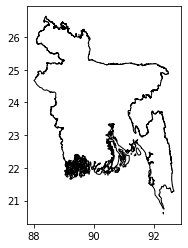

In [65]:
# Import a bounadary .dbf file of the Bangladesh

bound = gpd.read_file("bgd_adm_bbs_20201113_SHP/bgd_admbnda_adm0_bbs_20201113.dbf")
bound.plot(color = "white",edgecolor = 'black')

Text(0.5, 1.0, 'The location of the class1 drought')

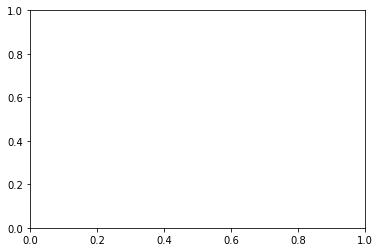

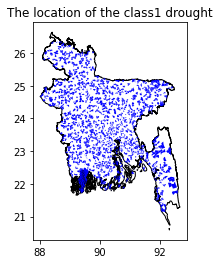

In [13]:
# Marker plotting of the class1 data, in which, background map is the Boundary map of Bangladesh

f,ax = plt.subplots(1,1)
base = bound.plot(color = "white",edgecolor = 'black')
class1.plot(ax = base,marker = '*',color = 'b',markersize = 1)
plt.title("The location of the class1 drought")

Text(0.5, 1.0, 'The location of the class2 drought')

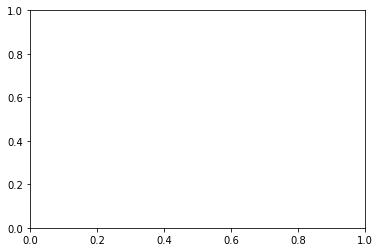

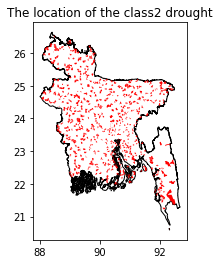

In [14]:
# Marker plotting of the class2 data, in which, background map is the Boundary map of Bangladesh
f,ax = plt.subplots(1,1)
base = bound.plot(color = "white",edgecolor = 'black')
class2.plot(ax = base,marker = 'o',color = 'red',markersize = 1)
plt.title("The location of the class2 drought")

Text(0.5, 1.0, 'The location of the class3 drought')

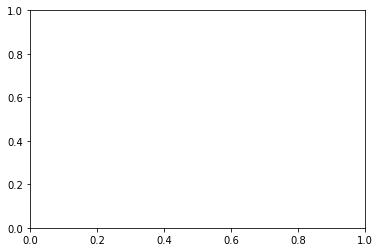

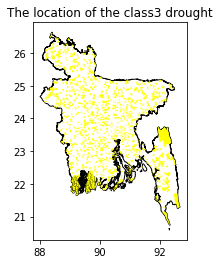

In [15]:
# Marker plotting of the class3 data, in which, background map is the Boundary map of Bangladesh
f,ax = plt.subplots(1,1)
base = bound.plot(color = "white",edgecolor = 'black')
class3.plot(ax = base,marker = 'o',color = 'yellow',markersize = 1)
plt.title("The location of the class3 drought")

Text(0.5, 1.0, 'The location of the class4 drought')

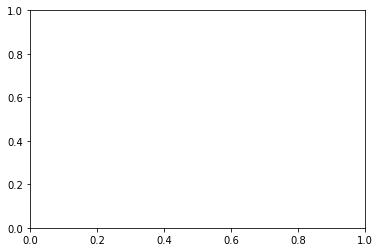

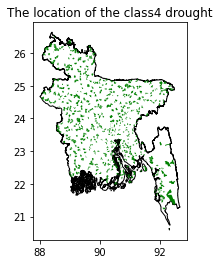

In [16]:
# Marker plotting of the class4 data, in which, background map is the Boundary map of Bangladesh
f,ax = plt.subplots(1,1)
base = bound.plot(color = "white",edgecolor = 'black')
class2.plot(ax = base,marker = 'o',color = 'green',markersize = 1)
plt.title("The location of the class4 drought")

In [39]:
"""The drawback or error of the analysis by now is that, the shape of the boundary file and the shape of the 
data2 is not equal. Thus the plot might be wrong. Although if anyone has the data of exactly equal size, than this 
analysis by now can be useable. But wre can correct thsis analysis! To correct this analysis, we will drop the
duplicate from the THANANAME and merge with the Bangladesh Administrative vector data for Uapazilla level.
Thus, drought will plotted only upto the Thana/Upazilla."""


# The drought data for only Thanas/Upazillas
data3 = data2.drop_duplicates(subset = ['THANANAME'])
data3

,AREA,PERIMETER,DD_TM_,DD_TM_ID,GEOCODE,THANANAME,DROU_CLASS,DROUGHT_CL,THANA_NAME,AREA_SQKM,geometry
0,90394100.0,65584.95,2,13135,57790,Tentulia,3,Moderate,TENTULIA,196.73,"POLYGON ((89.29995 23.62161, 89.30005 23.62142..."
6,160575000.0,84833.34,8,13129,57773,Panchagarh Sadar,3,Moderate,PANCHAGARH SADAR,237.49,"POLYGON ((90.70237 22.24601, 90.70086 22.24283..."
9,199876000.0,118261.50,11,13126,55270,Patgram,4,Slight,PATGRAM,242.67,"POLYGON ((90.66034 24.79451, 90.66038 24.79428..."
15,204411000.0,116666.50,17,13088,57704,Atwari,4,Slight,ATWARI,218.94,"POLYGON ((91.14868 24.38212, 91.14873 24.38206..."
16,144020000.0,107948.10,18,13117,57725,Boda,3,Moderate,BODA,432.39,"POLYGON ((91.86054 24.33583, 91.86057 24.33570..."
...,...,...,...,...,...,...,...,...,...,...,...
12400,472060000.0,192227.70,12402,177,20373,Naikhongchhari,11,"Non T.Aman Areas (MLL, LL, VLL & Hills)",NAIKHONGCHHARI,696.14,None
12420,65741500.0,94415.19,12422,154,22224,Cox'S Bazar Sadar,11,"Non T.Aman Areas (MLL, LL, VLL & Hills)",COX'S BAZAR SADAR,106.18,None
12423,326890000.0,172816.30,12425,56,22266,Ramu,1,Very Severe,RAMU,364.82,None
12514,239805000.0,74800.38,12516,48,22294,Ukhia,4,Slight,UKHIA,260.22,None


In [58]:
# Bangladesh Administrative vector data for Upazilla

bd2 = gpd.read_file("bgd_adm_bbs_20201113_SHP/bgd_admbnda_adm3_bbs_20201113.dbf")
bd2

,Shape_Leng,Shape_Area,ADM3_EN,ADM3_PCODE,ADM3_REF,ADM3ALT1EN,ADM3ALT2EN,ADM2_EN,ADM2_PCODE,ADM1_EN,ADM1_PCODE,ADM0_EN,ADM0_PCODE,date,validOn,validTo,geometry
0,1.171879,0.021753,Abhaynagar,BD404104,None,None,None,Jessore,BD4041,Khulna,BD40,Bangladesh,BD,2015-01-01,2020-11-13,None,"POLYGON ((89.44292 23.10798, 89.44288 23.10777..."
1,0.068860,0.000203,Adabor,BD302602,None,None,None,Dhaka,BD3026,Dhaka,BD30,Bangladesh,BD,2015-01-01,2020-11-13,None,"POLYGON ((90.35181 23.77788, 90.35201 23.77785..."
2,1.233722,0.015457,Adamdighi,BD501006,None,None,None,Bogra,BD5010,Rajshahi,BD50,Bangladesh,BD,2015-01-01,2020-11-13,None,"POLYGON ((89.08198 24.87312, 89.08235 24.87305..."
3,1.032025,0.017815,Aditmari,BD555202,None,None,None,Lalmonirhat,BD5552,Rangpur,BD55,Bangladesh,BD,2015-01-01,2020-11-13,None,"MULTIPOLYGON (((89.42583 26.04433, 89.42939 26..."
4,0.687378,0.013744,Agailjhara,BD100602,None,None,None,Barisal,BD1006,Barisal,BD10,Bangladesh,BD,2015-01-01,2020-11-13,None,"POLYGON ((90.17736 23.04662, 90.17753 23.04661..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1.102709,0.022191,Wazirpur,BD100694,None,None,None,Barisal,BD1006,Barisal,BD10,Bangladesh,BD,2015-01-01,2020-11-13,None,"POLYGON ((90.03673 22.93440, 90.03690 22.93439..."
541,1.048280,0.023558,Zakiganj,BD609194,None,None,None,Sylhet,BD6091,Sylhet,BD60,Bangladesh,BD,2015-01-01,2020-11-13,None,"POLYGON ((92.39664 24.98883, 92.39687 24.98882..."
542,0.913345,0.022822,Zanjira,BD308694,None,None,None,Shariatpur,BD3086,Dhaka,BD30,Bangladesh,BD,2015-01-01,2020-11-13,None,"POLYGON ((90.30197 23.45155, 90.30219 23.45150..."
543,0.688667,0.008837,Zianagar,BD107990,None,None,None,Pirojpur,BD1079,Barisal,BD10,Bangladesh,BD,2015-01-01,2020-11-13,None,"POLYGON ((89.94921 22.54047, 89.94929 22.54045..."


In [59]:
# Remove the null values
thana = bd2.dropna(subset=["Shape_Area"])
thana

,Shape_Leng,Shape_Area,ADM3_EN,ADM3_PCODE,ADM3_REF,ADM3ALT1EN,ADM3ALT2EN,ADM2_EN,ADM2_PCODE,ADM1_EN,ADM1_PCODE,ADM0_EN,ADM0_PCODE,date,validOn,validTo,geometry
0,1.171879,0.021753,Abhaynagar,BD404104,None,None,None,Jessore,BD4041,Khulna,BD40,Bangladesh,BD,2015-01-01,2020-11-13,None,"POLYGON ((89.44292 23.10798, 89.44288 23.10777..."
1,0.068860,0.000203,Adabor,BD302602,None,None,None,Dhaka,BD3026,Dhaka,BD30,Bangladesh,BD,2015-01-01,2020-11-13,None,"POLYGON ((90.35181 23.77788, 90.35201 23.77785..."
2,1.233722,0.015457,Adamdighi,BD501006,None,None,None,Bogra,BD5010,Rajshahi,BD50,Bangladesh,BD,2015-01-01,2020-11-13,None,"POLYGON ((89.08198 24.87312, 89.08235 24.87305..."
3,1.032025,0.017815,Aditmari,BD555202,None,None,None,Lalmonirhat,BD5552,Rangpur,BD55,Bangladesh,BD,2015-01-01,2020-11-13,None,"MULTIPOLYGON (((89.42583 26.04433, 89.42939 26..."
4,0.687378,0.013744,Agailjhara,BD100602,None,None,None,Barisal,BD1006,Barisal,BD10,Bangladesh,BD,2015-01-01,2020-11-13,None,"POLYGON ((90.17736 23.04662, 90.17753 23.04661..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539,0.152158,0.000621,Uttara,BD302695,None,None,None,Dhaka,BD3026,Dhaka,BD30,Bangladesh,BD,2015-01-01,2020-11-13,None,"POLYGON ((90.38476 23.89490, 90.38476 23.89490..."
540,1.102709,0.022191,Wazirpur,BD100694,None,None,None,Barisal,BD1006,Barisal,BD10,Bangladesh,BD,2015-01-01,2020-11-13,None,"POLYGON ((90.03673 22.93440, 90.03690 22.93439..."
541,1.048280,0.023558,Zakiganj,BD609194,None,None,None,Sylhet,BD6091,Sylhet,BD60,Bangladesh,BD,2015-01-01,2020-11-13,None,"POLYGON ((92.39664 24.98883, 92.39687 24.98882..."
542,0.913345,0.022822,Zanjira,BD308694,None,None,None,Shariatpur,BD3086,Dhaka,BD30,Bangladesh,BD,2015-01-01,2020-11-13,None,"POLYGON ((90.30197 23.45155, 90.30219 23.45150..."


In [60]:
# Create a column named THANANAME with the values of the ADM3_EN (Upazilla_name), that will be used to merge the datasets latter.


c =thana["ADM3_EN"]
thana["THANANAME"]=c
thana

/home/hp/.local/lib/python3.8/site-packages/geopandas/geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


,Shape_Leng,Shape_Area,ADM3_EN,ADM3_PCODE,ADM3_REF,ADM3ALT1EN,ADM3ALT2EN,ADM2_EN,ADM2_PCODE,ADM1_EN,ADM1_PCODE,ADM0_EN,ADM0_PCODE,date,validOn,validTo,geometry,THANANAME
0,1.171879,0.021753,Abhaynagar,BD404104,None,None,None,Jessore,BD4041,Khulna,BD40,Bangladesh,BD,2015-01-01,2020-11-13,None,"POLYGON ((89.44292 23.10798, 89.44288 23.10777...",Abhaynagar
1,0.068860,0.000203,Adabor,BD302602,None,None,None,Dhaka,BD3026,Dhaka,BD30,Bangladesh,BD,2015-01-01,2020-11-13,None,"POLYGON ((90.35181 23.77788, 90.35201 23.77785...",Adabor
2,1.233722,0.015457,Adamdighi,BD501006,None,None,None,Bogra,BD5010,Rajshahi,BD50,Bangladesh,BD,2015-01-01,2020-11-13,None,"POLYGON ((89.08198 24.87312, 89.08235 24.87305...",Adamdighi
3,1.032025,0.017815,Aditmari,BD555202,None,None,None,Lalmonirhat,BD5552,Rangpur,BD55,Bangladesh,BD,2015-01-01,2020-11-13,None,"MULTIPOLYGON (((89.42583 26.04433, 89.42939 26...",Aditmari
4,0.687378,0.013744,Agailjhara,BD100602,None,None,None,Barisal,BD1006,Barisal,BD10,Bangladesh,BD,2015-01-01,2020-11-13,None,"POLYGON ((90.17736 23.04662, 90.17753 23.04661...",Agailjhara
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539,0.152158,0.000621,Uttara,BD302695,None,None,None,Dhaka,BD3026,Dhaka,BD30,Bangladesh,BD,2015-01-01,2020-11-13,None,"POLYGON ((90.38476 23.89490, 90.38476 23.89490...",Uttara
540,1.102709,0.022191,Wazirpur,BD100694,None,None,None,Barisal,BD1006,Barisal,BD10,Bangladesh,BD,2015-01-01,2020-11-13,None,"POLYGON ((90.03673 22.93440, 90.03690 22.93439...",Wazirpur
541,1.048280,0.023558,Zakiganj,BD609194,None,None,None,Sylhet,BD6091,Sylhet,BD60,Bangladesh,BD,2015-01-01,2020-11-13,None,"POLYGON ((92.39664 24.98883, 92.39687 24.98882...",Zakiganj
542,0.913345,0.022822,Zanjira,BD308694,None,None,None,Shariatpur,BD3086,Dhaka,BD30,Bangladesh,BD,2015-01-01,2020-11-13,None,"POLYGON ((90.30197 23.45155, 90.30219 23.45150...",Zanjira


In [61]:
# Merging Thana and drought data that share common Thana/Upazilla name

merged = pd.merge(thana,data3,how = 'inner',on = ["THANANAME"])
merged


,Shape_Leng,Shape_Area,ADM3_EN,ADM3_PCODE,ADM3_REF,ADM3ALT1EN,ADM3ALT2EN,ADM2_EN,ADM2_PCODE,ADM1_EN,...,AREA,PERIMETER,DD_TM_,DD_TM_ID,GEOCODE,DROU_CLASS,DROUGHT_CL,THANA_NAME,AREA_SQKM,geometry_y
0,1.171879,0.021753,Abhaynagar,BD404104,None,None,None,Jessore,BD4041,Khulna,...,4532550.0,10573.530,9765,2890,44104,3,Moderate,ABHAYNAGAR,238.04,None
1,1.233722,0.015457,Adamdighi,BD501006,None,None,None,Bogra,BD5010,Rajshahi,...,116478000.0,117189.800,2644,9600,51006,2,Severe,ADAMDIGHI,178.59,"POLYGON ((88.81334 23.93236, 88.81319 23.93233..."
2,1.032025,0.017815,Aditmari,BD555202,None,None,None,Lalmonirhat,BD5552,Rangpur,...,70217800.0,84717.870,226,12668,55202,3,Moderate,ADITMARI,189.41,"POLYGON ((90.34490 22.30806, 90.34497 22.30789..."
3,0.687378,0.013744,Agailjhara,BD100602,None,None,None,Barisal,BD1006,Barisal,...,355518.5,3331.087,9975,2703,10602,4,Slight,AGAILJHARA,155.07,None
4,1.109008,0.016437,Ajmiriganj,BD603602,None,None,None,Habiganj,BD6036,Sylhet,...,254959000.0,162267.900,3107,8869,63602,10,"Non T.Aman Areas (MLL, LL, VLL & Hills)",AJMIRIGANJ,211.98,"POLYGON ((90.71616 24.14863, 90.71604 24.14843..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454,1.495596,0.041457,Ulipur,BD554994,None,None,None,Kurigram,BD5549,Rangpur,...,58051200.0,73257.560,536,12307,54994,4,Slight,ULIPUR,455.93,"POLYGON ((89.23405 24.31553, 89.23398 24.31535..."
455,1.493325,0.036881,Ullah Para,BD508894,None,None,None,Sirajganj,BD5088,Rajshahi,...,1307430.0,4536.299,4828,8055,58894,3,Moderate,ULLAH PARA,415.34,"POLYGON ((91.05793 23.20139, 91.05800 23.20130..."
456,1.102709,0.022191,Wazirpur,BD100694,None,None,None,Barisal,BD1006,Barisal,...,146358000.0,86300.020,10278,2389,10694,10,"Non T.Aman Areas (MLL, LL, VLL & Hills)",WAZIRPUR,248.86,None
457,1.048280,0.023558,Zakiganj,BD609194,None,None,None,Sylhet,BD6091,Sylhet,...,96843900.0,127876.700,1931,10699,69194,5,No Drought,ZAKIGANJ,271.24,"POLYGON ((91.07304 22.98721, 91.07305 22.98697..."


In [62]:
# To plot in geopandas in latter, create a column named geometry

c = merged["geometry_y"]
merged["geometry"]=c
merged

,Shape_Leng,Shape_Area,ADM3_EN,ADM3_PCODE,ADM3_REF,ADM3ALT1EN,ADM3ALT2EN,ADM2_EN,ADM2_PCODE,ADM1_EN,...,PERIMETER,DD_TM_,DD_TM_ID,GEOCODE,DROU_CLASS,DROUGHT_CL,THANA_NAME,AREA_SQKM,geometry_y,geometry
0,1.171879,0.021753,Abhaynagar,BD404104,None,None,None,Jessore,BD4041,Khulna,...,10573.530,9765,2890,44104,3,Moderate,ABHAYNAGAR,238.04,None,None
1,1.233722,0.015457,Adamdighi,BD501006,None,None,None,Bogra,BD5010,Rajshahi,...,117189.800,2644,9600,51006,2,Severe,ADAMDIGHI,178.59,"POLYGON ((88.81334 23.93236, 88.81319 23.93233...","POLYGON ((88.81334 23.93236, 88.81319 23.93233..."
2,1.032025,0.017815,Aditmari,BD555202,None,None,None,Lalmonirhat,BD5552,Rangpur,...,84717.870,226,12668,55202,3,Moderate,ADITMARI,189.41,"POLYGON ((90.34490 22.30806, 90.34497 22.30789...","POLYGON ((90.34490 22.30806, 90.34497 22.30789..."
3,0.687378,0.013744,Agailjhara,BD100602,None,None,None,Barisal,BD1006,Barisal,...,3331.087,9975,2703,10602,4,Slight,AGAILJHARA,155.07,None,None
4,1.109008,0.016437,Ajmiriganj,BD603602,None,None,None,Habiganj,BD6036,Sylhet,...,162267.900,3107,8869,63602,10,"Non T.Aman Areas (MLL, LL, VLL & Hills)",AJMIRIGANJ,211.98,"POLYGON ((90.71616 24.14863, 90.71604 24.14843...","POLYGON ((90.71616 24.14863, 90.71604 24.14843..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454,1.495596,0.041457,Ulipur,BD554994,None,None,None,Kurigram,BD5549,Rangpur,...,73257.560,536,12307,54994,4,Slight,ULIPUR,455.93,"POLYGON ((89.23405 24.31553, 89.23398 24.31535...","POLYGON ((89.23405 24.31553, 89.23398 24.31535..."
455,1.493325,0.036881,Ullah Para,BD508894,None,None,None,Sirajganj,BD5088,Rajshahi,...,4536.299,4828,8055,58894,3,Moderate,ULLAH PARA,415.34,"POLYGON ((91.05793 23.20139, 91.05800 23.20130...","POLYGON ((91.05793 23.20139, 91.05800 23.20130..."
456,1.102709,0.022191,Wazirpur,BD100694,None,None,None,Barisal,BD1006,Barisal,...,86300.020,10278,2389,10694,10,"Non T.Aman Areas (MLL, LL, VLL & Hills)",WAZIRPUR,248.86,None,None
457,1.048280,0.023558,Zakiganj,BD609194,None,None,None,Sylhet,BD6091,Sylhet,...,127876.700,1931,10699,69194,5,No Drought,ZAKIGANJ,271.24,"POLYGON ((91.07304 22.98721, 91.07305 22.98697...","POLYGON ((91.07304 22.98721, 91.07305 22.98697..."


In [63]:
# To remove the None value from geometry, still one None value will be reamined in this method


merged.drop_duplicates(subset = ["geometry"])

,Shape_Leng,Shape_Area,ADM3_EN,ADM3_PCODE,ADM3_REF,ADM3ALT1EN,ADM3ALT2EN,ADM2_EN,ADM2_PCODE,ADM1_EN,...,PERIMETER,DD_TM_,DD_TM_ID,GEOCODE,DROU_CLASS,DROUGHT_CL,THANA_NAME,AREA_SQKM,geometry_y,geometry
0,1.171879,0.021753,Abhaynagar,BD404104,None,None,None,Jessore,BD4041,Khulna,...,10573.530,9765,2890,44104,3,Moderate,ABHAYNAGAR,238.04,None,None
1,1.233722,0.015457,Adamdighi,BD501006,None,None,None,Bogra,BD5010,Rajshahi,...,117189.800,2644,9600,51006,2,Severe,ADAMDIGHI,178.59,"POLYGON ((88.81334 23.93236, 88.81319 23.93233...","POLYGON ((88.81334 23.93236, 88.81319 23.93233..."
2,1.032025,0.017815,Aditmari,BD555202,None,None,None,Lalmonirhat,BD5552,Rangpur,...,84717.870,226,12668,55202,3,Moderate,ADITMARI,189.41,"POLYGON ((90.34490 22.30806, 90.34497 22.30789...","POLYGON ((90.34490 22.30806, 90.34497 22.30789..."
4,1.109008,0.016437,Ajmiriganj,BD603602,None,None,None,Habiganj,BD6036,Sylhet,...,162267.900,3107,8869,63602,10,"Non T.Aman Areas (MLL, LL, VLL & Hills)",AJMIRIGANJ,211.98,"POLYGON ((90.71616 24.14863, 90.71604 24.14843...","POLYGON ((90.71616 24.14863, 90.71604 24.14843..."
6,0.757048,0.012608,Akkelpur,BD503813,None,None,None,Joypurhat,BD5038,Rajshahi,...,113994.000,2013,10814,53813,2,Severe,AKKELPUR,139.16,"POLYGON ((90.96418 22.95269, 90.96426 22.95257...","POLYGON ((90.96418 22.95269, 90.96426 22.95257..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,1.807459,0.062543,Thakurgaon Sadar,BD559494,None,None,None,Thakurgaon,BD5594,Rangpur,...,241134.700,64,12885,59494,2,Severe,THAKURGAON SADAR,651.83,"POLYGON ((89.17752 25.92431, 89.17774 25.92419...","POLYGON ((89.17752 25.92431, 89.17774 25.92419..."
451,1.191007,0.030011,Trishal,BD456194,None,None,None,Mymensingh,BD4561,Mymensingh,...,3843.488,3763,9225,36194,10,"Non T.Aman Areas (MLL, LL, VLL & Hills)",TRISHAL,335.95,"MULTIPOLYGON (((90.50620 22.81594, 90.50620 22...","MULTIPOLYGON (((90.50620 22.81594, 90.50620 22..."
454,1.495596,0.041457,Ulipur,BD554994,None,None,None,Kurigram,BD5549,Rangpur,...,73257.560,536,12307,54994,4,Slight,ULIPUR,455.93,"POLYGON ((89.23405 24.31553, 89.23398 24.31535...","POLYGON ((89.23405 24.31553, 89.23398 24.31535..."
455,1.493325,0.036881,Ullah Para,BD508894,None,None,None,Sirajganj,BD5088,Rajshahi,...,4536.299,4828,8055,58894,3,Moderate,ULLAH PARA,415.34,"POLYGON ((91.05793 23.20139, 91.05800 23.20130...","POLYGON ((91.05793 23.20139, 91.05800 23.20130..."


In [64]:
# Repeat the previous process to categorization of the data and plotting

data2 = merged.copy()
class1 = data2[(data2["DROU_CLASS"]<=11.0) & (data2["DROU_CLASS"]>=10.0)]
class2 = data2[(data2["DROU_CLASS"]<=9.0) & (data2["DROU_CLASS"]>=7.0)]
class3 = data2[(data2["DROU_CLASS"]<=6.0) & (data2["DROU_CLASS"]>=4.0)]
class4 = data2[(data2["DROU_CLASS"]<=3.0) & (data2["DROU_CLASS"]>=1.0)]

Text(0.5, 1.0, 'The location of the class1 drought')

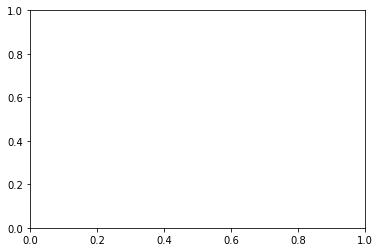

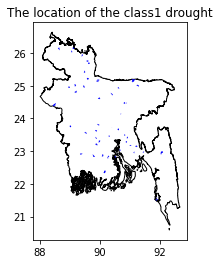

In [70]:
f,ax = plt.subplots(1,1)
base = bound.plot(color = "white",edgecolor = 'black')
class1.plot(ax = base,marker = '*',color = 'b',markersize = 10)
plt.title("The location of the class1 drought")

Text(0.5, 1.0, 'The location of the class2 drought')

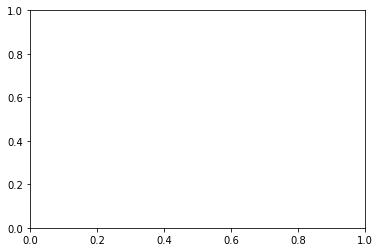

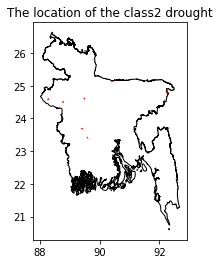

In [69]:
f,ax = plt.subplots(1,1)
base = bound.plot(color = "white",edgecolor = 'black')
class2.plot(ax = base,marker = 'o',color = 'red',markersize = 10)
plt.title("The location of the class2 drought")

Text(0.5, 1.0, 'The location of the class3 drought')

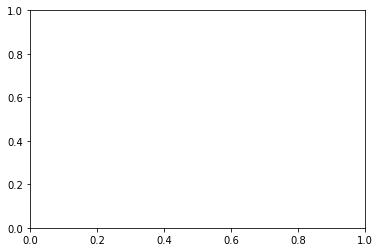

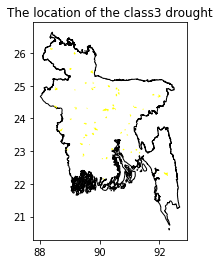

In [71]:
f,ax = plt.subplots(1,1)
base = bound.plot(color = "white",edgecolor = 'black')
class3.plot(ax = base,marker = 'o',color = 'yellow',markersize = 10)
plt.title("The location of the class3 drought")

Text(0.5, 1.0, 'The location of the class4 drought')

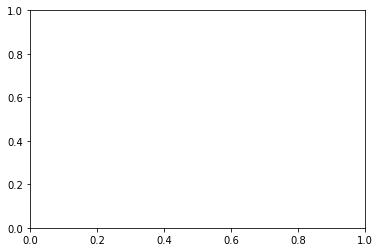

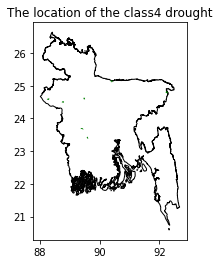

In [76]:
f,ax = plt.subplots(1,1)
base = bound.plot(color = "white",edgecolor = 'black')
class2.plot(ax = base,marker = 'o',color = 'green',markersize = 10)
plt.title("The location of the class4 drought")